In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']

In [4]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [5]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features),
    ]
)

In [6]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [11]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [18]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('-------------------------------------------')
    print('Model performance for Test set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.2733
- Mean Absolute Error: 4.2145
- R2 Score: 0.8827
-------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5891
- Mean Absolute Error: 4.4019
- R2 Score: 0.8438


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4778
- Mean Absolute Error: 5.1300
- R2 Score: 0.8229
-------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3425
- Mean Absolute Error: 4.9522
- R2 Score: 0.7989


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2686
- Mean Absolute Error: 4.2158
- R2 Score: 0.8829
-------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5773
- Mean Absolute Error: 4.3773
- R2 Score: 0.8445


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8453
- Mean Absolute Error: 4.6435
- R2 Score: 0.85

In [19]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.844507
0,LinearRegression,0.843849
7,CatBoosting Regressor,0.827956
8,AdaBoost Regressor,0.806691
5,Random Forest Regressor,0.800110
1,Lasso,0.798910
6,XGBRegressor,0.765524
3,K-Neighbors Regressor,0.747524
4,Decision Tree,0.585350


In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 84.38


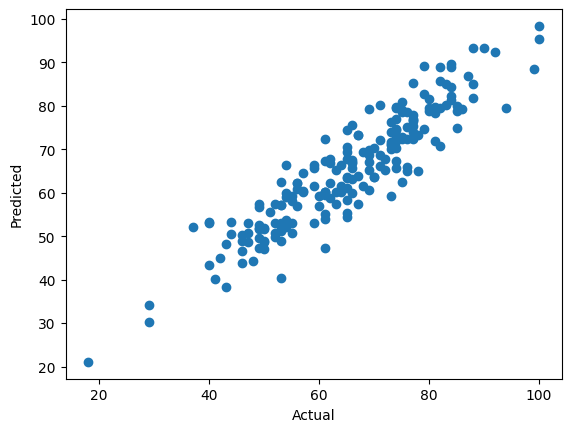

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual");
plt.ylabel('Predicted');

<Axes: xlabel='math score'>

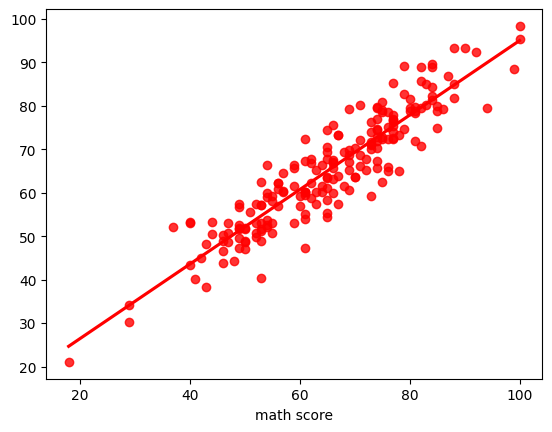

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [23]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred,'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
632,66,67.1250,-1.1250
687,77,77.0625,-0.0625
833,77,76.6250,0.3750
182,50,47.1250,2.8750
831,74,71.8750,2.1250
...,...,...,...
258,70,70.1875,-0.1875
118,51,55.5625,-4.5625
279,73,59.1875,13.8125
458,100,95.3750,4.6250
